In [1]:
pip install hazm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 892.6/892.6 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 55.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.0/235.0 kB 23.8 MB/s eta 0:00:00
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9296 sha256=49786a883b4564c12b17fffa19d6d05eed6bc1fcb0b7b9e3b257387491f13756
  Stored in directory: /root/.cache/pip/wheels/bc/be/39/c37ad168eb2ff644c9685f52554440372129450f0b8ed203dd
Successfully built flashtext
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. Thi

In [1]:
pip install emoji

  Using cached emoji-2.12.1-py3-none-any.whl (431 kB)


In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from hazm import stopwords_list, Stemmer, Lemmatizer
from sklearn.model_selection import train_test_split
import pandas as pd
import copy
import re
import emoji
from bs4 import BeautifulSoup
import nltk
from hazm import Normalizer, word_tokenize, Stemmer, Lemmatizer
from nltk.tokenize import word_tokenize
#import hunspell
import torch
from transformers import AutoTokenizer, AutoModel
import gc
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, SpatialDropout1D, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam , SGD
import math
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score ,roc_curve ,auc
from google.colab import drive
from transformers import AutoTokenizer, AutoModel
import torch
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
import gc
from transformers import BertTokenizer, BertModel
import torch.nn as nn
import torch
import keras

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


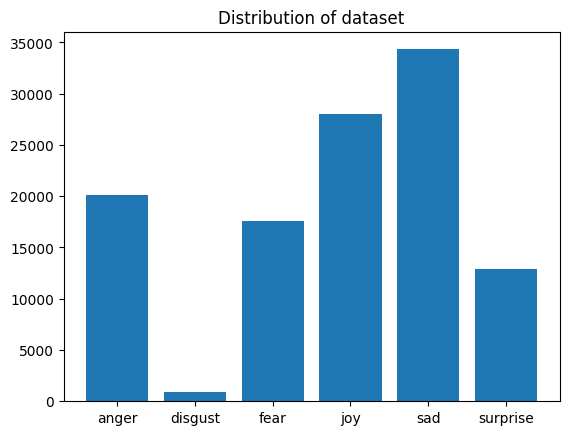

In [5]:
classes = ['anger', 'disgust', 'fear', 'joy', 'sad', 'surprise']
data_distribution = {}
dfs = []
for c in classes:
    path = os.path.join('/content/drive/MyDrive/persian-tweets-emotional-dataset', '{}.csv'.format(c))
    df = pd.read_csv(path)
    dfs.append(df[['tweet', 'emotion']])
    data_distribution[c] = len(df)
data = pd.concat(dfs, axis=0, ignore_index=True)
plt.bar(data_distribution.keys() , data_distribution.values());
plt.title('Distribution of dataset');


In [6]:
data.head()

,tweet,emotion
0,دیشب خواب دیدم بمبی چیزی زدن نورش خیلی خیره کن...,anger
1,تبر زدی بر ریشه‌اَم، جوانه رویید جایِ زخم\nران...,anger
2,پدر سوخته ای که بابام بهم میگه دو معنی داره که...,anger
3,با خود مواجه شوید و اخم نکنید. اقتدار در نگاه ...,anger
4,مدح تو را در شادی و در غم نوشتند\nبا این همه ا...,anger


In [7]:
X_data = data['tweet']
y_data = data['emotion']

print(X_data.shape, y_data.shape)

(113829,) (113829,)


In [ ]:
emoji_to_farsi = {
    'grinning_face': 'خندان',
    'crying_face': 'گریه',
    'red_heart': 'قلب',
    'smiling_face_with_heart-eyes': 'عاشقانه',
    'face_with_tears_of_joy': 'خنده با اشک',
    'thumbs_up': 'لایک',
    'clapping_hands': 'تشویق',
    'winking_face': 'چشمک',
    'folded_hands': 'دعا',
    'face_with_medical_mask': 'ماسک',
    'face_with_rolling_eyes': 'چشم غلتان',
    'face_with_monocle': 'عینک تک چشمی',
    'beaming_face_with_smiling_eyes': 'خنده با چشمان بسته',
    'partying_face': 'جشن',
    'face_with_hand_over_mouth': 'خنده با دست بر روی دهان',
    'face_savoring_food': 'خوردن غذا',
    'face_with_raised_eyebrow': 'ابرو بالا رفته',
    'thinking_face': 'تفکر',
    'zipper_mouth_face': 'دهان زیپ شده',
    'smiling_face_with_sunglasses': 'عینک آفتابی',
    'face_with_thermometer': 'تب',
    'sleeping_face': 'خواب',
    'drooling_face': 'آب دهان',
    'shushing_face': 'هیس',
    'nerd_face': 'نرد',
    'smirking_face': 'نیشخند',
    'flushed_face': 'شرمنده',
    'face_with_steam_from_nose': 'خشمگین',
    'grimacing_face': 'ناراحت',
    'face_with_head_bandage': 'باند سر',
    'money_mouth_face': 'پول',
    'face_with_symbols_on_mouth': 'فحش',
    'exploding_head': 'سر منفجر',
    'hot_face': 'گرم',
    'cold_face': 'سرد',
    'face_with_cowboy_hat': 'کلاه کابویی',
    'hugging_face': 'بغل',
    'face_with_hand_over_mouth': 'خنده با دست بر روی دهان',
    'face_vomiting': 'استفراغ',
    'sneezing_face': 'عطسه',
    'dizzy_face': 'سرگیجه',
    'face_with_crossed_out_eyes': 'چشمان خط خورده',
    'face_blowing_a_kiss': 'بوسه',
    'grinning_face_with_big_eyes': 'خندان با چشمان بزرگ',
    'grinning_face_with_smiling_eyes': 'خندان با چشمان بسته',
    'grinning_face_with_sweat': 'خندان با عرق',
    'crying_face': 'گریه',
    'angry_face': 'عصبانی',
    'pensive_face': 'اندیشمند',
    'smiling_face_with_smiling_eyes': 'لبخند با چشمان بسته',
    'pouting_face': 'اخمو',
    'face_with_tongue': 'زبان بیرون',
    'winking_face_with_tongue': 'چشمک با زبان بیرون',
    'squinting_face_with_tongue': 'چشمان بسته با زبان بیرون',
    'money_mouth_face': 'پول',
    'hushed_face': 'ساکت',
    'frowning_face_with_open_mouth': 'اخم با دهان باز',
    'anguished_face': 'آشفته',
    'fearful_face': 'ترسیده',
    'weary_face': 'خسته',
    'sleeping_face': 'خواب',
    'lying_face': 'دروغگو',
    'relieved_face': 'آرام',
    'face_with_open_mouth': 'دهان باز',
    'smiling_face_with_halo': 'لبخند با هاله',
    'neutral_face': 'خنثی',
    'expressionless_face': 'بی‌احساس',
    'unamused_face': 'ناراحت',
    'downcast_face_with_sweat': 'ناراحت با عرق',
    'pensive_face': 'اندیشمند',
    'confused_face': 'گیج',
    'upside_down_face': 'وارونه',
    'rolling_on_the_floor_laughing': 'خنده روی زمین',
    'face_with_open_mouth': 'دهان باز',
    'face_with_head_bandage': 'باند سر',
    'face_with_thermometer': 'تب',
    'nauseated_face': 'حالت تهوع',
    'face_vomiting': 'استفراغ',
    'sneezing_face': 'عطسه',
    'hot_face': 'گرم',
    'cold_face': 'سرد',
    'woozy_face': 'گیج',
    'dizzy_face': 'سرگیجه',
    'exploding_head': 'سر منفجر',
    'face_with_cowboy_hat': 'کلاه کابویی',
    'smiling_face_with_sunglasses': 'عینک آفتابی',
    'nerd_face': 'نرد',
    'face_with_monocle': 'عینک تک چشمی',
    'confounded_face': 'گیج',
    'astonished_face': 'متعجب',
    'sleeping_face': 'خواب',
    'dizzy_face': 'سرگیجه',
    'face_with_raised_eyebrow': 'ابرو بالا رفته',
    'grinning_face_with_sweat': 'خندان با عرق',
    'crying_face': 'گریه',
    'angry_face': 'عصبانی',
    'worried_face': 'نگران',
    'frowning_face_with_open_mouth': 'اخم با دهان باز',
    'anguished_face': 'آشفته',
    'fearful_face': 'ترسیده',
    'weary_face': 'خسته',
    'lying_face': 'دروغگو',
    'face_with_head_bandage': 'باند سر',
    'face_with_thermometer': 'تب',
    'nauseated_face': 'حالت تهوع',
    'face_vomiting': 'استفراغ',
    'sneezing_face': 'عطسه',
    'hot_face': 'گرم',
    'cold_face': 'سرد',
    'woozy_face': 'گیج',
    'dizzy_face': 'سرگیجه',
    'exploding_head': 'سر منفجر'
}

In [8]:
def url_html_remover(text):
    url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    text_without_urls = re.sub(url_pattern, '', text)
    soup = BeautifulSoup(text_without_urls, "lxml")
    text_without_html = soup.get_text()
    return text_without_html
def repetitive_chars_remover(text):
    return re.sub(r'(.)\1{1,}', r'\1', text)
def replace_emojis(text):
    return emoji.demojize(text, language='fa')
normalizer = Normalizer()
def stop_word_remover(text):
        stop_words = stopwords_list()
        new_text = ""
        for word in text:
            if word not in stop_words:
                new_text += word
        return copy.deepcopy(new_text)
def stemmer(text):
    tokens = text.split(' ')
    stemmer_obj = Stemmer()
    stemmed_tokens = [stemmer_obj.stem(token) for token in tokens]
    cleaned_text = " ".join(stemmed_tokens)
    return cleaned_text
def spell_check_and_correct(text, hunspell_checker):
    tokens = word_tokenize(text)
    corrected_tokens = []
    for token in tokens:
        if not hunspell_checker.spell(token):
            suggestions = hunspell_checker.suggest(token)
            if suggestions:
                corrected_tokens.append(suggestions[0])
            else:
                corrected_tokens.append(token)
        else:
            corrected_tokens.append(token)
    return ' '.join(corrected_tokens)

In [9]:
data['text']=data['tweet'].apply(lambda x: url_html_remover(x))

<ipython-input-8-822ede11ea9f>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text_without_urls, "lxml")


In [10]:
data.head()

,tweet,emotion,text
0,دیشب خواب دیدم بمبی چیزی زدن نورش خیلی خیره کن...,anger,دیشب خواب دیدم بمبی چیزی زدن نورش خیلی خیره کن...
1,تبر زدی بر ریشه‌اَم، جوانه رویید جایِ زخم\nران...,anger,تبر زدی بر ریشه‌اَم، جوانه رویید جایِ زخم\nران...
2,پدر سوخته ای که بابام بهم میگه دو معنی داره که...,anger,پدر سوخته ای که بابام بهم میگه دو معنی داره که...
3,با خود مواجه شوید و اخم نکنید. اقتدار در نگاه ...,anger,با خود مواجه شوید و اخم نکنید. اقتدار در نگاه ...
4,مدح تو را در شادی و در غم نوشتند\nبا این همه ا...,anger,مدح تو را در شادی و در غم نوشتند\nبا این همه ا...


In [11]:
data['text']=data['text'].apply(lambda x: repetitive_chars_remover(x))

In [12]:
data.head()

,tweet,emotion,text
0,دیشب خواب دیدم بمبی چیزی زدن نورش خیلی خیره کن...,anger,دیشب خواب دیدم بمبی چیزی زدن نورش خیلی خیره کن...
1,تبر زدی بر ریشه‌اَم، جوانه رویید جایِ زخم\nران...,anger,تبر زدی بر ریشه‌اَم، جوانه روید جایِ زخم\nراند...
2,پدر سوخته ای که بابام بهم میگه دو معنی داره که...,anger,پدر سوخته ای که بابام بهم میگه دو معنی داره که...
3,با خود مواجه شوید و اخم نکنید. اقتدار در نگاه ...,anger,با خود مواجه شوید و اخم نکنید. اقتدار در نگاه ...
4,مدح تو را در شادی و در غم نوشتند\nبا این همه ا...,anger,مدح تو را در شادی و در غم نوشتند\nبا این همه ا...


In [13]:
data['text'][0]

'دیشب خواب دیدم بمبی چیزی زدن نورش خیلی خیره کنده س و سبزه. کورمال کورمال گوشیمو پیدا کردم عکس بگیرم و در عین حال دیدم خمینی ملعون آفتابه به دست داره میره ته دره، اخم کرده بود. آخرین باری که دیدم خامنه ای تو خوابم اخم کرده قاسم کتلت شد.حالا بینیم این خواب چی میشه!😏\n#No2IR'

In [14]:
data['text'][11]

'آره منو ول کرده سراغ بچه خودش رفته 😂\nوای اوایل اینقدر به همسرش و بچه اش حسودی میکردم همیشه اخم داشتم 😂\nآره دقیقا \nولی فقط برای کسای که دوسشون دارم بقیه آدما برام مهم نیستن\n💛\nYugyeom\nGOT7\n#유겸\n#갓세븐 \n \n'

In [15]:
data['text']=data['text'].apply(lambda x: replace_emojis(x))

In [16]:
data['text'][11]

'آره منو ول کرده سراغ بچه خودش رفته :روده_بر:\nوای اوایل اینقدر به همسرش و بچه اش حسودی میکردم همیشه اخم داشتم :روده_بر:\nآره دقیقا \nولی فقط برای کسای که دوسشون دارم بقیه آدما برام مهم نیستن\n:قلب_زرد:\nYugyeom\nGOT7\n#유겸\n#갓세븐 \n \n'

In [17]:
data['text']=data['text'].apply(lambda x: normalizer.normalize(x))

In [18]:
data['text'][11]

'آره منو ول کرده سراغ بچه خودش رفته: روده_بر: \nوای اوایل اینقدر به همسرش و بچه\u200cاش حسودی می\u200cکردم همیشه اخم داشتم: روده_بر: \nآره دقیقا\nولی فقط برای کسای که دوسشون دارم بقیه آدما برام مهم نیستن\n: قلب_زرد: \nYugyeom\nGOT ۷\n#유겸\n#갓세븐\n\n'

In [19]:
data['text']=data['text'].apply(lambda x: word_tokenize(x))

In [20]:
data['text'][11]

['آره',
 'منو',
 'ول',
 'کرده',
 'سراغ',
 'بچه',
 'خودش',
 'رفته',
 ':',
 'روده_بر',
 ':',
 'وای',
 'اوایل',
 'اینقدر',
 'به',
 'همسرش',
 'و',
 'بچه\u200cاش',
 'حسودی',
 'می\u200cکردم',
 'همیشه',
 'اخم',
 'داشتم',
 ':',
 'روده_بر',
 ':',
 'آره',
 'دقیقا',
 'ولی',
 'فقط',
 'برای',
 'کسای',
 'که',
 'دوسشون',
 'دارم',
 'بقیه',
 'آدما',
 'برام',
 'مهم',
 'نیستن',
 ':',
 'قلب_زرد',
 ':',
 'Yugyeom',
 'GOT',
 '۷',
 '#',
 '유겸',
 '#',
 '갓세븐']

In [21]:
data['text'] = data['text'].apply(lambda x: [token for token in x if len(token) >= 3])

In [22]:
data['text'][11]

['آره',
 'منو',
 'کرده',
 'سراغ',
 'بچه',
 'خودش',
 'رفته',
 'روده_بر',
 'وای',
 'اوایل',
 'اینقدر',
 'همسرش',
 'بچه\u200cاش',
 'حسودی',
 'می\u200cکردم',
 'همیشه',
 'اخم',
 'داشتم',
 'روده_بر',
 'آره',
 'دقیقا',
 'ولی',
 'فقط',
 'برای',
 'کسای',
 'دوسشون',
 'دارم',
 'بقیه',
 'آدما',
 'برام',
 'مهم',
 'نیستن',
 'قلب_زرد',
 'Yugyeom',
 'GOT',
 '갓세븐']

In [23]:
data['text'] = data['text'].apply(lambda x: [token.lower() for token in x])

In [24]:
data['text'][11]

['آره',
 'منو',
 'کرده',
 'سراغ',
 'بچه',
 'خودش',
 'رفته',
 'روده_بر',
 'وای',
 'اوایل',
 'اینقدر',
 'همسرش',
 'بچه\u200cاش',
 'حسودی',
 'می\u200cکردم',
 'همیشه',
 'اخم',
 'داشتم',
 'روده_بر',
 'آره',
 'دقیقا',
 'ولی',
 'فقط',
 'برای',
 'کسای',
 'دوسشون',
 'دارم',
 'بقیه',
 'آدما',
 'برام',
 'مهم',
 'نیستن',
 'قلب_زرد',
 'yugyeom',
 'got',
 '갓세븐']

In [25]:
data['text'] = data['text'].apply(lambda x: ' '.join(x))

In [26]:
data['text'][11]

'آره منو کرده سراغ بچه خودش رفته روده_بر وای اوایل اینقدر همسرش بچه\u200cاش حسودی می\u200cکردم همیشه اخم داشتم روده_بر آره دقیقا ولی فقط برای کسای دوسشون دارم بقیه آدما برام مهم نیستن قلب_زرد yugyeom got 갓세븐'

In [27]:
data['text']=data['text'].apply(lambda x: stop_word_remover(x))

In [28]:
data['text'][11]

'آره من کرده سراغ بچه خدش رفته رده_بر ای اایل اینقدر همسرش بچه\u200cاش حسدی می\u200cکردم همیشه اخم داشتم رده_بر آره دقیقا لی فقط برای کسای دسشن دارم بقیه آدما برام مهم نیستن قلب_زرد yugyeom got 갓세븐'

In [29]:
data['text']=data['text'].apply(lambda x: stemmer(x))

In [30]:
data['text'][11]

'آره من کرده سراغ بچه خد رفته رده_بر ا اایل اینقدر همسر بچه حسد می\u200cکرد همیشه اخ دا رده_بر آره دقیقا ل فقط برا کسا دسشن دار بقیه آدما برا مه نیستن قلب_زرد yugyeom got 갓세븐'

In [ ]:
X_data = data['text']
y_data = data['emotion']

print(X_data.shape, y_data.shape)

(113829,) (113829,)


In [ ]:
X_New = data['text'].apply(lambda x: [token.lower() for token in x]).copy()
y_data = data['emotion'].copy()
X_1, X_2, y_1, y_2 =train_test_split(X_new, y_data, test_size=0.1, random_state=42 , shuffle= True)
print(X_2.shape,y_2.shape)
X_new_train, X_new_test, y_new_train, y_new_test =train_test_split(X_2, y_2, test_size=0.2, random_state=42 , shuffle= True)


(11383,) (11383,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_new_train)
X_val_tfidf = vectorizer.transform(X_new_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


clf = MultinomialNB().fit(X_train_tfidf, y_new_train)


train_acc = clf.score(X_train_tfidf, y_new_train)
val_acc = clf.score(X_val_tfidf, y_new_test)


y_train_pred = clf.predict(X_train_tfidf)
y_val_pred = clf.predict(X_val_tfidf)


train_f1 = f1_score(y_new_train, y_train_pred, average='weighted')
train_precision = precision_score(y_new_train, y_train_pred, average='weighted')
train_recall = recall_score(y_new_train, y_train_pred, average='weighted')

val_f1 = f1_score(y_new_test, y_val_pred, average='weighted')
val_precision = precision_score(y_new_test, y_val_pred, average='weighted')
val_recall = recall_score(y_new_test, y_val_pred, average='weighted')


print(f'train acc: {train_acc}, validation acc: {val_acc}')
print(f'train F1: {train_f1}, train precision: {train_precision}, train recall: {train_recall}')
print(f'val F1: {val_f1}, val precision: {val_precision}, val recall: {val_recall}')


train acc: 0.6813090270151548, validation acc: 0.5037329819938515
train F1: 0.6573251984078932, train precision: 0.8183345857296797, train recall: 0.6813090270151548
val F1: 0.46134572181160577, val precision: 0.7549674975442867, val recall: 0.5037329819938515


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.linear_model import LogisticRegression


clf = LogisticRegression(random_state=42).fit(X_train_tfidf, y_new_train)


train_acc = clf.score(X_train_tfidf, y_new_train)
val_acc = clf.score(X_val_tfidf, y_new_test)


y_train_pred = clf.predict(X_train_tfidf)
y_val_pred = clf.predict(X_val_tfidf)


train_f1 = f1_score(y_new_train, y_train_pred, average='weighted')
train_precision = precision_score(y_new_train, y_train_pred, average='weighted')
train_recall = recall_score(y_new_train, y_train_pred, average='weighted')

val_f1 = f1_score(y_new_test, y_val_pred, average='weighted')
val_precision = precision_score(y_new_test, y_val_pred, average='weighted')
val_recall = recall_score(y_new_test, y_val_pred, average='weighted')


print(f'train acc: {train_acc}, validation acc: {val_acc}')
print(f'train F1: {train_f1}, train precision: {train_precision}, train recall: {train_recall}')
print(f'val F1: {val_f1}, val precision: {val_precision}, val recall: {val_recall}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train acc: 0.9681528662420382, validation acc: 0.8726394378568292
train F1: 0.967406838108108, train precision: 0.9690001891800073, train recall: 0.9681528662420382
val F1: 0.8724537301766478, val precision: 0.8842230744153093, val recall: 0.8726394378568292


In [ ]:
from sklearn.svm import LinearSVC


clf = LinearSVC(random_state=42).fit(X_train_tfidf, y_new_train)


train_acc = clf.score(X_train_tfidf, y_new_train)
val_acc = clf.score(X_val_tfidf, y_new_test)


y_train_pred = clf.predict(X_train_tfidf)
y_val_pred = clf.predict(X_val_tfidf)


train_f1 = f1_score(y_new_train, y_train_pred, average='weighted')
train_precision = precision_score(y_new_train, y_train_pred, average='weighted')
train_recall = recall_score(y_new_train, y_train_pred, average='weighted')

val_f1 = f1_score(y_new_test, y_val_pred, average='weighted')
val_precision = precision_score(y_new_test, y_val_pred, average='weighted')
val_recall = recall_score(y_new_test, y_val_pred, average='weighted')


print(f'train acc: {train_acc}, validation acc: {val_acc}')
print(f'train F1: {train_f1}, train precision: {train_precision}, train recall: {train_recall}')
print(f'val F1: {val_f1}, val precision: {val_precision}, val recall: {val_recall}')

train acc: 0.9964858335163629, validation acc: 0.9209486166007905
train F1: 0.9964864149210864, train precision: 0.9964893711806991, train recall: 0.9964858335163629
val F1: 0.9211695165580164, val precision: 0.9219384949745787, val recall: 0.9209486166007905


# Word embedding

In [31]:
class CustomBertModel(nn.Module):
    def __init__(self, model_name, output_dim):
        super(CustomBertModel, self).__init__()
        self.bert = AutoModel.from_pretrained(model_name)
        self.linear = nn.Linear(self.bert.config.hidden_size, output_dim)

    def forward(self, input_ids):
        outputs = self.bert(input_ids=input_ids)
        last_hidden_state = outputs.last_hidden_state
        reduced_embeddings = self.linear(last_hidden_state)
        return reduced_embeddings

model_name = 'HooshvareLab/bert-fa-zwnj-base'  # Specify the BERT model variant
tokenizer = BertTokenizer.from_pretrained(model_name)
model = CustomBertModel(model_name, output_dim=120)
model = model.cuda()
def tokenize_sentences(sentences, max_length=32):
    tokenized = []
    print(len(sentences))
    for sentence in sentences:
        tokens = tokenizer.encode(sentence, add_special_tokens=True)
        chunk = []
        for i in range(0, len(tokens), max_length):
            chunk = tokens[i:i+max_length]
            if len(chunk) < max_length:
                chunk += [tokenizer.pad_token_id] * (max_length - len(chunk))
        tokenized.append(chunk)
        del chunk
    return tokenized
def compute_and_reduce_embeddings(tokenized_sentences, model):
    embeddings = []
    with torch.no_grad():
        for tokens in tokenized_sentences:
            tokens_tensor = torch.tensor([tokens])
            tokens_tensor = tokens_tensor.cuda()
            #print(tokens)
            outputs = model(tokens_tensor)
            #cls_embedding = outputs.last_hidden_state.numpy().reshape(32,768)
            #print('nima')
            print(outputs.cpu().numpy().shape)
            reduced_embeddings= outputs.cpu().numpy().reshape(32,120)
            # cls_embeddings = pca.fit_transform(cls_embedding)
            reduced_embeddings = np.array(reduced_embeddings)
            print(reduced_embeddings.shape)
            embeddings.append(reduced_embeddings)
    embeddings = np.array(embeddings)
    print(embeddings.shape)
    return embeddings
batch_size = 100
all_reduced_embeddings = []
tokenized_sentences = tokenize_sentences(data['text'])
for i in range(0, len(tokenized_sentences), batch_size):
    print(i)
    batch = tokenized_sentences[i:i+batch_size]
    reduced_embeddings = compute_and_reduce_embeddings(batch, model)
    all_reduced_embeddings.extend(reduced_embeddings)
    gc.collect()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/292 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/426k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/134 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.11M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/473M [00:00<?, ?B/s]

Some weights of BertModel were not initialized from the model checkpoint at HooshvareLab/bert-fa-zwnj-base and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


113829
0


We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


Streaming output truncated to the last 5000 lines.
(32, 120)
(1, 32, 120)
(32, 120)
(1, 32, 120)
(32, 120)
(1, 32, 120)
(32, 120)
(1, 32, 120)
(32, 120)
(1, 32, 120)
(32, 120)
(1, 32, 120)
(32, 120)
(1, 32, 120)
(32, 120)
(1, 32, 120)
(32, 120)
(1, 32, 120)
(32, 120)
(1, 32, 120)
(32, 120)
(1, 32, 120)
(32, 120)
(1, 32, 120)
(32, 120)
(1, 32, 120)
(32, 120)
(1, 32, 120)
(32, 120)
(1, 32, 120)
(32, 120)
(1, 32, 120)
(32, 120)
(1, 32, 120)
(32, 120)
(1, 32, 120)
(32, 120)
(1, 32, 120)
(32, 120)
(1, 32, 120)
(32, 120)
(1, 32, 120)
(32, 120)
(1, 32, 120)
(32, 120)
(1, 32, 120)
(32, 120)
(1, 32, 120)
(32, 120)
(1, 32, 120)
(32, 120)
(1, 32, 120)
(32, 120)
(1, 32, 120)
(32, 120)
(1, 32, 120)
(32, 120)
(1, 32, 120)
(32, 120)
(1, 32, 120)
(32, 120)
(1, 32, 120)
(32, 120)
(1, 32, 120)
(32, 120)
(1, 32, 120)
(32, 120)
(1, 32, 120)
(32, 120)
(1, 32, 120)
(32, 120)
(1, 32, 120)
(32, 120)
(1, 32, 120)
(32, 120)
(1, 32, 120)
(32, 120)
(1, 32, 120)
(32, 120)
(1, 32, 120)
(32, 120)
(1, 32, 120)
(32, 1

In [32]:
all_reduced_embeddings = np.array(all_reduced_embeddings)
print(all_reduced_embeddings.shape)
# np.save('all_reduced_embeddings.npy', all_reduced_embeddings)

# import numpy as np
# from sklearn.decomposition import PCA

# # ایجاد نمونه‌ای از داده‌های تصادفی با ابعاد 32 در 768
# data = np.random.rand(32,768)

# # ایجاد مدل PCA با 120 مؤلفه
# pca = PCA(n_components=(1,120))

# # کاهش بعد برای هر نمونه به صورت جداگانه
# reduced_data = np.array([pca.fit_transform(data)])

# print("Original shape:", data.shape)
# print("Reduced shape:", reduced_data.shape)



(113829, 32, 120)


In [33]:
X_data = all_reduced_embeddings
y_data = data['emotion']

print(X_data.shape, y_data.shape)

(113829, 32, 120) (113829,)


In [34]:
classes = ['anger', 'disgust', 'fear', 'joy', 'sad', 'surprise']
name2id = {'anger': 1 , 'disgust':2 , 'fear': 3 , 'joy' :  4, 'sad': 5, 'surprise' : 6}
num_classes = 6
for i in range(len(y_data)):
    y_data[i] = name2id[y_data[i]]

# y_data = to_categorical(y_data, num_classes=num_classes)

In [35]:
y_data=y_data-1

In [36]:
X_train, X_test, y_train, y_test =train_test_split(X_data, y_data, test_size=0.3, random_state=42 , shuffle= True)
print(X_train.shape,y_train.shape)

(79680, 32, 120) (79680,)


In [37]:
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, SpatialDropout1D, Dense, Flatten
from keras.optimizers import Adam, SGD
from keras.losses import CategoricalCrossentropy
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from sklearn.metrics import classification_report, roc_auc_score ,accuracy_score
import numpy as np
import tensorflow as tf
import gc


num_classes = 6

early_stopping_cb = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, SpatialDropout1D, Dense, Flatten
from keras.optimizers import Adam, SGD
from keras.losses import CategoricalCrossentropy
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from sklearn.metrics import classification_report, roc_auc_score ,accuracy_score
import numpy as np
import tensorflow as tf
import gc


num_classes = 6

early_stopping_cb = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
Models = []

i = 1
y_train =  y_train.astype(int)
y_test =  y_test.astype(int)
for bs in [8, 64]:
    for lr in [0.001, 0.0001]:
        for opt in [Adam, SGD]:
            model = Sequential()
            model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(32, 120)))
            model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
            model.add(MaxPooling1D(pool_size=2))
            model.add(LSTM(units=100, return_sequences=True))
            model.add(LSTM(units=100, return_sequences=True))
            model.add(SpatialDropout1D(rate=0.2))
            model.add(Flatten())
            model.add(Dense(units=100, activation='relu'))
            model.add(Dense(units=num_classes, activation='softmax'))
            model.compile(optimizer=opt(learning_rate=lr), loss=CategoricalCrossentropy(), metrics=['accuracy'])

            model.fit(X_train, to_categorical(y_train, num_classes=num_classes), epochs=5, batch_size=bs, validation_split=0.2, callbacks=[early_stopping_cb])
            y_pred = y_pred.astype(int)


            y_pred = np.argmax(model.predict(X_test), axis=1)
            print(i)
            print(y_test[:5],y_pred[:5])
            accuracy = accuracy_score(y_test, y_pred)
            print("Validation Accuracy:", accuracy)
            print("Classification Report:")
            print(classification_report(y_test, y_pred))



            i += 1


            del model
            tf.keras.backend.clear_session()
            gc.collect()

Epoch 1/5
7968/7968 [==============================] - 71s 8ms/step - loss: 1.3879 - accuracy: 0.4307 - val_loss: 1.2378 - val_accuracy: 0.5109
Epoch 2/5
7968/7968 [==============================] - 63s 8ms/step - loss: 1.1412 - accuracy: 0.5516 - val_loss: 1.1049 - val_accuracy: 0.5648
Epoch 3/5
7968/7968 [==============================] - 63s 8ms/step - loss: 1.0540 - accuracy: 0.5859 - val_loss: 1.0780 - val_accuracy: 0.5724
Epoch 4/5
7968/7968 [==============================] - 64s 8ms/step - loss: 1.0152 - accuracy: 0.5995 - val_loss: 1.0716 - val_accuracy: 0.5814
Epoch 5/5
1068/1068 [==============================] - 4s 3ms/step
1
[4 4 0 4 2] [4 4 4 4 2]
Validation Accuracy: 0.5905883041963161
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.36      0.49      6001
           1       0.68      0.18      0.29       277
           2       0.80      0.47      0.59      5341
           3       0.74      0.56      0.64      84

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/5
7968/7968 [==============================] - 70s 8ms/step - loss: 1.4953 - accuracy: 0.3675 - val_loss: 1.4299 - val_accuracy: 0.4025
Epoch 2/5
7968/7968 [==============================] - 67s 8ms/step - loss: 1.3922 - accuracy: 0.4244 - val_loss: 1.3892 - val_accuracy: 0.4292
Epoch 3/5
7968/7968 [==============================] - 63s 8ms/step - loss: 1.3247 - accuracy: 0.4613 - val_loss: 1.3194 - val_accuracy: 0.4640
Epoch 4/5
7968/7968 [==============================] - 67s 8ms/step - loss: 1.2703 - accuracy: 0.4888 - val_loss: 1.2915 - val_accuracy: 0.4718
Epoch 5/5
1068/1068 [==============================] - 4s 3ms/step
3
[4 4 0 4 2] [4 3 2 4 4]
Validation Accuracy: 0.5002196257577088
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.28      0.38      6001
           1       0.00      0.00      0.00       277
           2       0.50      0.42      0.46      5341
           3       0.61      0.57      0.59      84

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/5
7968/7968 [==============================] - 67s 8ms/step - loss: 1.6750 - accuracy: 0.2957 - val_loss: 1.6179 - val_accuracy: 0.3016
Epoch 2/5
7968/7968 [==============================] - 69s 9ms/step - loss: 1.6049 - accuracy: 0.3013 - val_loss: 1.5988 - val_accuracy: 0.3016
Epoch 3/5
7968/7968 [==============================] - 68s 8ms/step - loss: 1.5937 - accuracy: 0.3013 - val_loss: 1.5934 - val_accuracy: 0.3016
Epoch 4/5
7968/7968 [==============================] - 66s 8ms/step - loss: 1.5905 - accuracy: 0.3005 - val_loss: 1.5918 - val_accuracy: 0.3016
Epoch 5/5
1068/1068 [==============================] - 4s 3ms/step
4
[4 4 0 4 2] [4 4 4 4 4]
Validation Accuracy: 0.30147295674836744
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6001
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00      5341
           3       0.00      0.00      0.00      8

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/5
996/996 [==============================] - 14s 10ms/step - loss: 1.4229 - accuracy: 0.4070 - val_loss: 1.3052 - val_accuracy: 0.4740
Epoch 2/5
996/996 [==============================] - 8s 8ms/step - loss: 1.1993 - accuracy: 0.5247 - val_loss: 1.1934 - val_accuracy: 0.5328
Epoch 3/5
996/996 [==============================] - 9s 9ms/step - loss: 1.1006 - accuracy: 0.5659 - val_loss: 1.1227 - val_accuracy: 0.5493
Epoch 4/5
996/996 [==============================] - 9s 9ms/step - loss: 1.0453 - accuracy: 0.5883 - val_loss: 1.0959 - val_accuracy: 0.5674
Epoch 5/5
1068/1068 [==============================] - 4s 3ms/step
5
[4 4 0 4 2] [4 4 4 4 0]
Validation Accuracy: 0.5795191660077894
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.53      0.50      6001
           1       0.63      0.10      0.18       277
           2       0.70      0.49      0.58      5341
           3       0.72      0.57      0.64      8478
       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/5
996/996 [==============================] - 14s 11ms/step - loss: 1.5426 - accuracy: 0.3325 - val_loss: 1.4856 - val_accuracy: 0.3716
Epoch 2/5
996/996 [==============================] - 8s 8ms/step - loss: 1.4584 - accuracy: 0.3846 - val_loss: 1.4378 - val_accuracy: 0.3987
Epoch 3/5
996/996 [==============================] - 9s 9ms/step - loss: 1.4150 - accuracy: 0.4105 - val_loss: 1.4101 - val_accuracy: 0.4206
Epoch 4/5
996/996 [==============================] - 9s 9ms/step - loss: 1.3834 - accuracy: 0.4287 - val_loss: 1.4023 - val_accuracy: 0.4185
Epoch 5/5
1068/1068 [==============================] - 5s 4ms/step
7
[4 4 0 4 2] [4 3 0 4 4]
Validation Accuracy: 0.44358546370318314
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.28      0.34      6001
           1       0.00      0.00      0.00       277
           2       0.56      0.26      0.35      5341
           3       0.66      0.43      0.52      8478
      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/5
996/996 [==============================] - 13s 10ms/step - loss: 1.7508 - accuracy: 0.2777 - val_loss: 1.7305 - val_accuracy: 0.3015
Epoch 2/5
996/996 [==============================] - 7s 8ms/step - loss: 1.7132 - accuracy: 0.2963 - val_loss: 1.6945 - val_accuracy: 0.3015
Epoch 3/5
996/996 [==============================] - 9s 9ms/step - loss: 1.6813 - accuracy: 0.2998 - val_loss: 1.6665 - val_accuracy: 0.3016
Epoch 4/5
996/996 [==============================] - 8s 8ms/step - loss: 1.6571 - accuracy: 0.3010 - val_loss: 1.6468 - val_accuracy: 0.3016
Epoch 5/5
1068/1068 [==============================] - 5s 4ms/step
8
[4 4 0 4 2] [4 4 4 4 4]
Validation Accuracy: 0.30147295674836744
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6001
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00      5341
           3       0.00      0.00      0.00      8478
      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(32, 120)))
# model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(units=100, return_sequences=True))
# model.add(LSTM(units=100, return_sequences=True))
model.add(SpatialDropout1D(rate=0.2))
model.add(Flatten())
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.0001), loss=CategoricalCrossentropy(), metrics=['accuracy'])

model.fit(X_train, to_categorical(y_train, num_classes=num_classes), epochs=50, batch_size=64, validation_split=0.2, callbacks=[early_stopping_cb])
y_pred = y_pred.astype(int)


y_pred = np.argmax(model.predict(X_test), axis=1)
accuracy = accuracy_score(y_test, y_pred)
print("Validation Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

del model
tf.keras.backend.clear_session()
gc.collect()

Epoch 1/20
996/996 [==============================] - 15s 12ms/step - loss: 1.5395 - accuracy: 0.3413 - val_loss: 1.4961 - val_accuracy: 0.3658
Epoch 2/20
996/996 [==============================] - 7s 7ms/step - loss: 1.4596 - accuracy: 0.3884 - val_loss: 1.4457 - val_accuracy: 0.4019
Epoch 3/20
996/996 [==============================] - 6s 6ms/step - loss: 1.4111 - accuracy: 0.4162 - val_loss: 1.4124 - val_accuracy: 0.4161
Epoch 4/20
996/996 [==============================] - 7s 7ms/step - loss: 1.3761 - accuracy: 0.4355 - val_loss: 1.3858 - val_accuracy: 0.4283
Epoch 5/20
996/996 [==============================] - 8s 8ms/step - loss: 1.3456 - accuracy: 0.4493 - val_loss: 1.3617 - val_accuracy: 0.4465
Epoch 6/20
996/996 [==============================] - 6s 6ms/step - loss: 1.3208 - accuracy: 0.4633 - val_loss: 1.3480 - val_accuracy: 0.4527
Epoch 7/20
996/996 [==============================] - 6s 6ms/step - loss: 1.2974 - accuracy: 0.4749 - val_loss: 1.3316 - val_accuracy: 0.4622
Epoc

14888

In [ ]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(32, 120)))
# model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(units=100, return_sequences=True))
# model.add(LSTM(units=100, return_sequences=True))
model.add(SpatialDropout1D(rate=0.2))
model.add(Flatten())
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.0001), loss=CategoricalCrossentropy(), metrics=['accuracy'])

model.fit(X_train, to_categorical(y_train, num_classes=num_classes), epochs=50, batch_size=64, validation_split=0.2, callbacks=[early_stopping_cb])
y_pred = y_pred.astype(int)


y_pred = np.argmax(model.predict(X_test), axis=1)
accuracy = accuracy_score(y_test, y_pred)
print("Validation Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

del model
tf.keras.backend.clear_session()
gc.collect()

Epoch 1/50
996/996 [==============================] - 15s 12ms/step - loss: 1.5345 - accuracy: 0.3427 - val_loss: 1.4801 - val_accuracy: 0.3702
Epoch 2/50
996/996 [==============================] - 8s 8ms/step - loss: 1.4564 - accuracy: 0.3867 - val_loss: 1.4414 - val_accuracy: 0.4030
Epoch 3/50
996/996 [==============================] - 6s 6ms/step - loss: 1.4162 - accuracy: 0.4104 - val_loss: 1.4140 - val_accuracy: 0.4150
Epoch 4/50
996/996 [==============================] - 6s 6ms/step - loss: 1.3834 - accuracy: 0.4300 - val_loss: 1.3907 - val_accuracy: 0.4310
Epoch 5/50
996/996 [==============================] - 7s 7ms/step - loss: 1.3569 - accuracy: 0.4415 - val_loss: 1.3824 - val_accuracy: 0.4342
Epoch 6/50
996/996 [==============================] - 6s 6ms/step - loss: 1.3349 - accuracy: 0.4535 - val_loss: 1.3539 - val_accuracy: 0.4493
Epoch 7/50
996/996 [==============================] - 7s 7ms/step - loss: 1.3139 - accuracy: 0.4638 - val_loss: 1.3443 - val_accuracy: 0.4526
Epoc

11489

In [44]:
y_train =  y_train.astype(int)
y_test =  y_test.astype(int)
model = Sequential()
model.add(LSTM(units=100, return_sequences=True ,input_shape=(32, 120)))
model.add(LSTM(units=100, return_sequences=True))
model.add(SpatialDropout1D(rate=0.2))
model.add(Flatten())
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.001), loss=CategoricalCrossentropy(), metrics=['accuracy'])

model.fit(X_train, to_categorical(y_train, num_classes=num_classes), epochs=5, batch_size=8, validation_split=0.2, callbacks=[early_stopping_cb])



y_pred = np.argmax(model.predict(X_test), axis=1)
y_pred = y_pred.astype(int)
accuracy = accuracy_score(y_test, y_pred)
print("Validation Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

del model
tf.keras.backend.clear_session()
gc.collect()

Epoch 1/5
7968/7968 [==============================] - 86s 10ms/step - loss: 1.3295 - accuracy: 0.4602 - val_loss: 1.1268 - val_accuracy: 0.5609
Epoch 2/5
7968/7968 [==============================] - 80s 10ms/step - loss: 1.0241 - accuracy: 0.5994 - val_loss: 0.9970 - val_accuracy: 0.6091
Epoch 3/5
7968/7968 [==============================] - 85s 11ms/step - loss: 0.9210 - accuracy: 0.6383 - val_loss: 1.0001 - val_accuracy: 0.6043
Epoch 4/5
7968/7968 [==============================] - 81s 10ms/step - loss: 0.8597 - accuracy: 0.6583 - val_loss: 0.9759 - val_accuracy: 0.6251
Epoch 5/5
1068/1068 [==============================] - 6s 4ms/step
Validation Accuracy: 0.6284225013909631
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.49      0.56      6001
           1       0.69      0.35      0.46       277
           2       0.76      0.54      0.63      5341
           3       0.71      0.65      0.68      8478
           4       

29653

In [41]:
del model
tf.keras.backend.clear_session()
gc.collect()

9192

In [45]:
y_train =  y_train.astype(int)
y_test =  y_test.astype(int)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(32, 120)))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(SpatialDropout1D(rate=0.2))
model.add(Flatten())
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.001), loss=CategoricalCrossentropy(), metrics=['accuracy'])

model.fit(X_train, to_categorical(y_train, num_classes=num_classes), epochs=5, batch_size=8, validation_split=0.2, callbacks=[early_stopping_cb])



y_pred = np.argmax(model.predict(X_test), axis=1)
y_pred = y_pred.astype(int)
accuracy = accuracy_score(y_test, y_pred)
print("Validation Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

del model
tf.keras.backend.clear_session()
gc.collect()

Epoch 1/5
7968/7968 [==============================] - 43s 5ms/step - loss: 1.4196 - accuracy: 0.4081 - val_loss: 1.2799 - val_accuracy: 0.4862
Epoch 2/5
7968/7968 [==============================] - 39s 5ms/step - loss: 1.1814 - accuracy: 0.5317 - val_loss: 1.1216 - val_accuracy: 0.5629
Epoch 3/5
7968/7968 [==============================] - 42s 5ms/step - loss: 1.0858 - accuracy: 0.5734 - val_loss: 1.0766 - val_accuracy: 0.5769
Epoch 4/5
7968/7968 [==============================] - 45s 6ms/step - loss: 1.0446 - accuracy: 0.5884 - val_loss: 1.0706 - val_accuracy: 0.5838
Epoch 5/5
1068/1068 [==============================] - 3s 2ms/step
Validation Accuracy: 0.5898269349029254
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.43      0.51      6001
           1       0.53      0.03      0.06       277
           2       0.70      0.51      0.59      5341
           3       0.70      0.58      0.63      8478
           4       0.48

17107